In [18]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('Resources/Customer-Churn-Records.csv')
df.head(25)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [20]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [22]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

**Target Value**  
- Exited  

**Values to be Removed**  
- Remove index rows: `RowNumber` and `CustomerId`  
- Remove `Surname`  

**Numerical X Values**  
- Credit Score  
- Age  
- Tenure  
- Balance  
- NumOfProducts  
- HasCrCard  
- IsActiveMember  
- EstimatedSalary  
- Complain  
- Satisfaction Score  
- Points Earned  

**Encoded X Variables**  
- Geography  
- Gender  

**Ordinal X**  
- Card Type

In [24]:
y = df['Exited']
print("Class distribution in target variable:\n", y.value_counts(normalize=True))


Class distribution in target variable:
 Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


In [25]:
X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname','Complain'])

In [26]:
encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND'])

In [27]:
categorical_columns = ['Geography', 'Gender']
ordinal_columns = ['Card Type']

In [28]:
encoded_columns = encoder.fit_transform(df[categorical_columns])
#Create a DataFrame with the encoded columns

one_hot_df = pd.DataFrame(encoded_columns, 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([X.drop(categorical_columns, axis=1), one_hot_df], axis=1)
df_encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,2,DIAMOND,464,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,3,DIAMOND,456,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,3,DIAMOND,377,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,5,GOLD,350,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,5,GOLD,425,0.0,0.0,1.0,1.0,0.0


In [29]:
ordinal_encoder = OrdinalEncoder(categories=[['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']])
ordinal_column = ordinal_encoder.fit_transform(df[['Card Type']])
ordinal_df = pd.DataFrame(ordinal_column, 
                          columns=ordinal_encoder.get_feature_names_out(['Card Type']))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_encoded.drop(['Card Type'], axis=1), ordinal_df], axis=1)
df_encoded.head(25)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type
0,619,42,2,0.00,1,1,1,101348.88,2,464,1.0,0.0,0.0,1.0,0.0,3.0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,0.0,0.0,1.0,1.0,0.0,3.0
2,502,42,8,159660.80,3,1,0,113931.57,3,377,1.0,0.0,0.0,1.0,0.0,3.0
3,699,39,1,0.00,2,0,0,93826.63,5,350,1.0,0.0,0.0,1.0,0.0,1.0
4,850,43,2,125510.82,1,1,1,79084.10,5,425,0.0,0.0,1.0,1.0,0.0,1.0
5,645,44,8,113755.78,2,1,0,149756.71,5,484,0.0,0.0,1.0,0.0,1.0,3.0
6,822,50,7,0.00,2,1,1,10062.80,2,206,1.0,0.0,0.0,0.0,1.0,0.0
7,376,29,4,115046.74,4,1,0,119346.88,2,282,0.0,1.0,0.0,1.0,0.0,3.0
8,501,44,4,142051.07,2,0,1,74940.50,3,251,1.0,0.0,0.0,0.0,1.0,1.0
9,684,27,2,134603.88,1,1,1,71725.73,3,342,1.0,0.0,0.0,0.0,1.0,1.0


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)



In [31]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(X_train)
scaler_test.fit(X_test)
X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

In [32]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, df_encoded, y, cv=5)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Evaluate the model
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

Cross-Validation Scores: [0.8345 0.848  0.8425 0.846  0.842 ]
Mean Cross-Validation Score: 0.8426
Accuracy Score: 0.851
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.61      0.68      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.86      0.85      0.85      2000

Balanced Accuracy: 0.79


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='balanced_accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Balanced Accuracy Score:", grid_search.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the optimized model
print("Optimized Accuracy Score:", accuracy_score(y_test, y_pred))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [33]:
# Feature importance analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)


# Print sorted feature importances
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))


Feature Importances:
 Age                   0.302480
NumOfProducts         0.195464
Balance               0.100326
Point Earned          0.062834
EstimatedSalary       0.061965
CreditScore           0.061034
IsActiveMember        0.052127
Geography_Germany     0.034470
Tenure                0.034009
Satisfaction Score    0.022105
Card Type             0.019251
Gender_Female         0.014764
Geography_France      0.012671
Gender_Male           0.011748
HasCrCard             0.007839
Geography_Spain       0.006912
dtype: float64


In [34]:
from sklearn.metrics import roc_auc_score

# Get probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate and display AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)


AUC Score: 0.8667170188947527


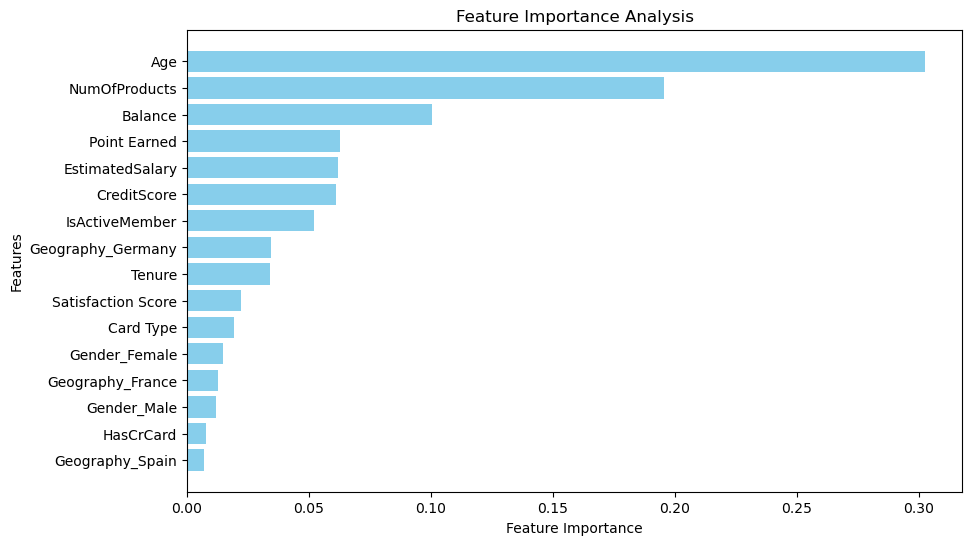

In [35]:
import matplotlib.pyplot as plt

# Feature importances from your model
features = [
    "Age", "NumOfProducts", "Balance", "Point Earned", "EstimatedSalary", 
    "CreditScore", "IsActiveMember", "Geography_Germany", "Tenure", 
    "Satisfaction Score", "Card Type", "Gender_Female", "Geography_France", 
    "Gender_Male", "HasCrCard", "Geography_Spain"
]
importances = [
    0.302480, 0.195464, 0.100326, 0.062834, 0.061965, 
    0.061034, 0.052127, 0.034470, 0.034009, 0.022105, 
    0.019251, 0.014764, 0.012671, 0.011748, 0.007839, 0.006912
]

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = [importances[i] for i in sorted_idx]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()
